# Задача 3. Многоклассовая классификация и множественная классификация/регрессия

Семенов Александр Сергеевич, группа 22.М05

Выполнил задачи:
- Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.
- Замерить время обучения каждой модели для каждой стратегии.
- Для оценки качества моделей используйте метрику AUC-ROC.
- Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- Дополнительное задание  (+2 балла). Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2

## 1. Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

Для задачи был выбран датасет Mobile Price Classification, который можно скачать по [ссылке](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&sortBy=voteCount)

In [2]:
import pandas as pd

data = pd.read_csv('mobile-price.csv')

Описание данных:
1. battery_power: Объем аккумулятора в мАч
2. blue: Наличие Bluetooth (1 - да, 0 - нет)
3. clock_speed: Скорость процессора в ГГц
4. dual_sim: Наличие двух SIM-карт (1 - да, 0 - нет)
5. fc: Количество фронтальных камер
6. four_g: Наличие 4G (1 - да, 0 - нет)
7. int_memory: Объем встроенной памяти в Гб
8. m_dep: Толщина телефона в см
9. mobile_wt: Вес телефона в г
10. n_cores: Количество ядер процессора
11. pc: Количество основных камер
12. px_height: Высота экрана в пикселях
13. px_width: Ширина экрана в пикселях
14. ram: Объем оперативной памяти в Мб
15. sc_h: Высота экрана в см
16. sc_w: Ширина экрана в см
17. talk_time: Время разговора в часах
18. three_g: Наличие 3G (1 - да, 0 - нет)
19. touch_screen: Наличие сенсорного экрана (1 - да, 0 - нет)
20. wifi: Наличие Wi-Fi (1 - да, 0 - нет)
21. price_range: Цена телефона (0 - низкая, 1 - средняя, 2 - высокая, 3 - очень высокая)

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Видим, что:
- Все признаки числовые
- В данных нет пропусков

## 2. Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

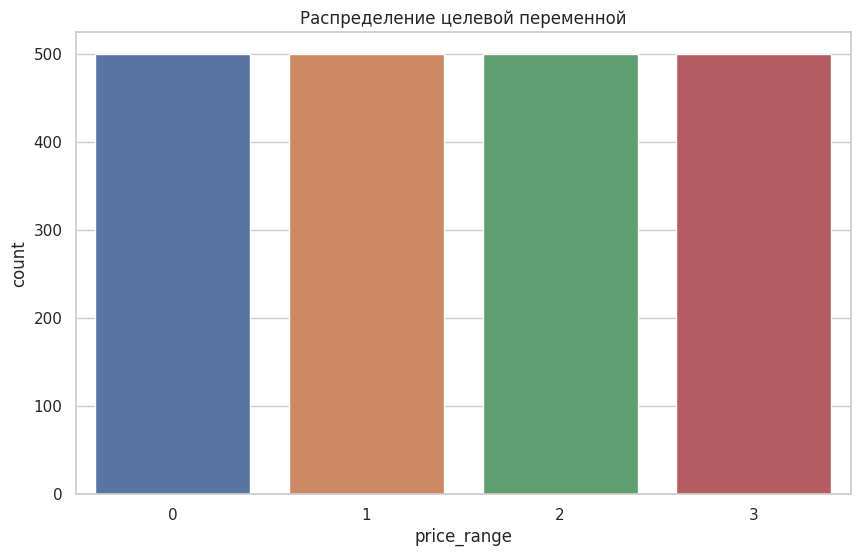

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=data)
plt.title('Распределение целевой переменной')
plt.show()

Видим, что данных по 500 объектов в каждом классе, что позволяет считать, что классы сбалансированы.

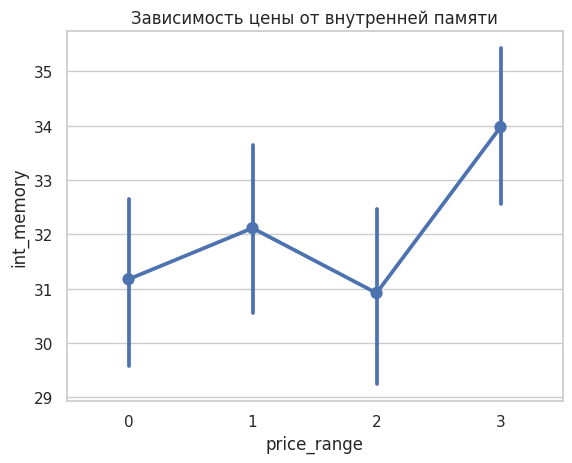

In [9]:
sns.pointplot(y="int_memory", x="price_range", data=data)
plt.title('Зависимость цены от внутренней памяти')
plt.show()

Видим, что в среднем телефоны из ценовой категории 3 (очень высокая цена) имеют больший объем оперативной памяти, чем телефоны из других ценовых категорий.

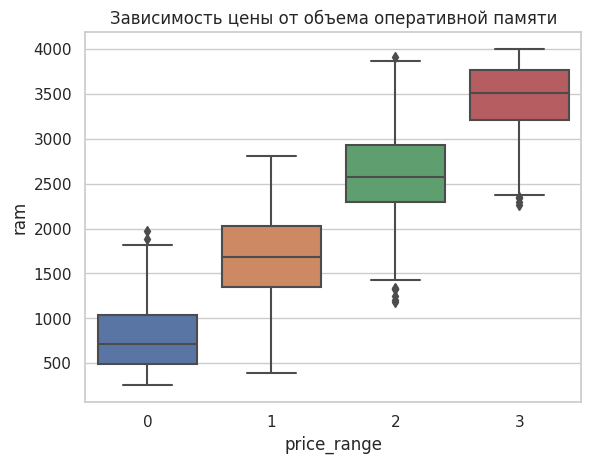

In [10]:
sns.boxplot(x="price_range", y="ram", data=data)
plt.title('Зависимость цены от объема оперативной памяти')
plt.show()

Также заметим, что объем оперативной памяти зависит чуть ли не линейно от цены телефона.

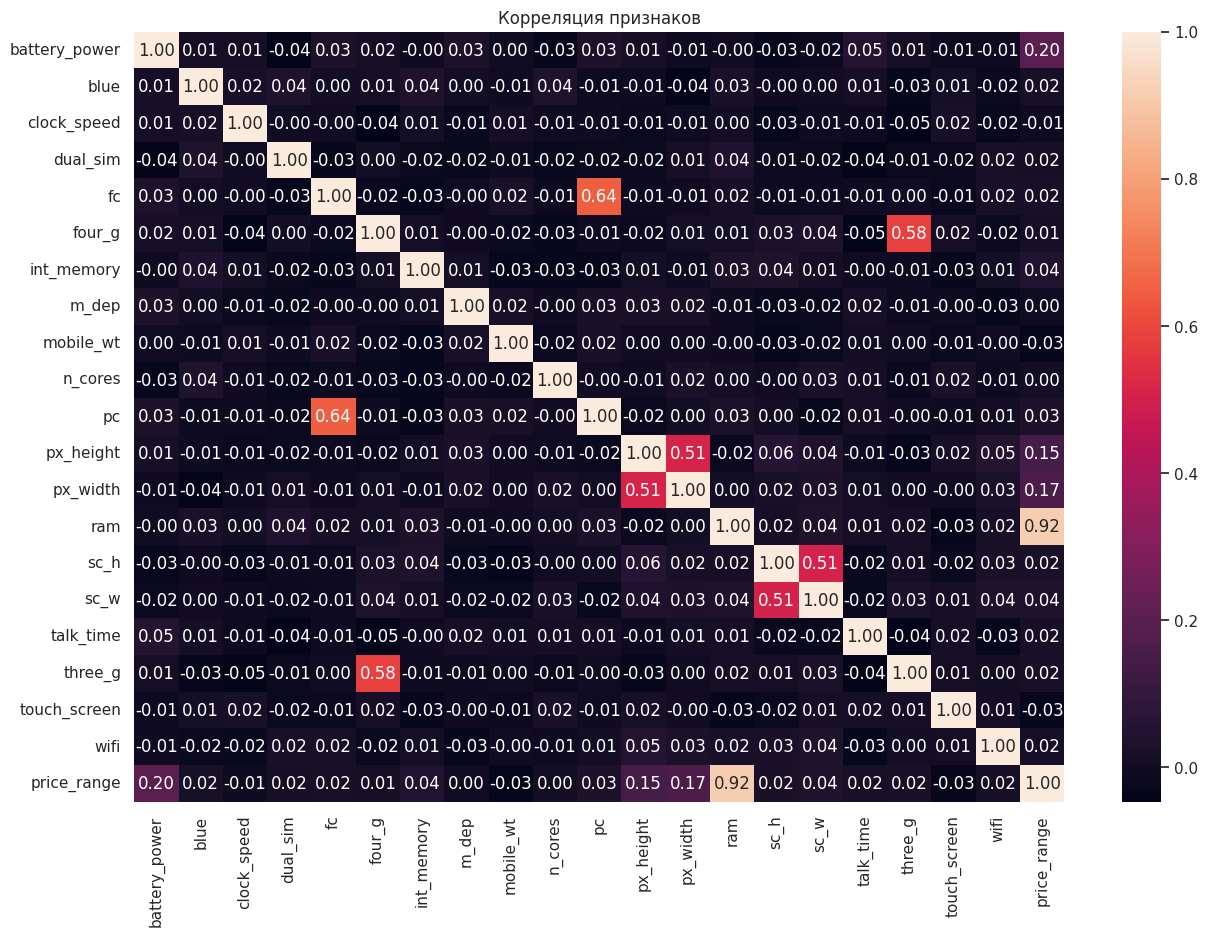

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Корреляция признаков')
plt.show()

Выводы по графику корреляции:
- Наличие 4G и 3G сильно коррелируют между собой
- Количество фронтальных и основных камер сильно коррелируют между собой
- С целевой переменной имеется очень сильная корреляция лишь с признаком ram

## 3. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Так как наши признаки все числовые и не имеют пропусков, то преобразований не требуется. Выполним лишь RFE для отбора признаков.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

X = data.drop('price_range', axis=1)
y = data['price_range']

Разделим выборку на обучающую и тестовую.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

### 4.1 Стратегия OneVsRest

#### 4.1.1 Logistic Regression

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = { 
    'C': [1, 10, 100],
    'solver': ['sag', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

model = LogisticRegression()

grid = GridSearchCV(model, params, scoring = 'roc_auc', cv=5)

ovr_lr_model = OneVsRestClassifier(grid)


In [51]:
import time

start_time = time.time()
ovr_lr_model.fit(X_train_scaled, y_train)
end_time = time.time()

from sklearn.metrics import accuracy_score

y_pred = ovr_lr_model.predict(X_test_scaled)

ovr_lr_accuracy = accuracy_score(y_test, y_pred)
ovr_lr_time = end_time - start_time

#### 4.1.2 SVM

In [71]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovr_svc_model = OneVsRestClassifier(grid)

In [72]:
start_time = time.time()
ovr_svc_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = ovr_svc_model.predict(X_test_scaled)

ovr_svc_accuracy = accuracy_score(y_test, y_pred)
ovr_svc_time = end_time - start_time

#### 4.1.3 KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovr_knn_model = OneVsRestClassifier(grid)

In [76]:
start_time = time.time()
ovr_knn_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = ovr_knn_model.predict(X_test_scaled)

ovr_knn_accuracy = accuracy_score(y_test, y_pred)
ovr_knn_time = end_time - start_time

#### 4.1.4 Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovr_nb_model = OneVsRestClassifier(grid)

In [78]:
start_time = time.time()
ovr_nb_model.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = ovr_nb_model.predict(X_test_scaled)

ovr_nb_accuracy = accuracy_score(y_test, y_pred)
ovr_nb_time = end_time - start_time

#### 4.1.5 Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovr_dt_model = OneVsRestClassifier(grid)

In [80]:
start = time.time()
ovr_dt_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = ovr_dt_model.predict(X_test_scaled)

ovr_dt_accuracy = accuracy_score(y_test, y_pred)
ovr_dt_time = end - start

### 4.2 Стратегия OneVsOne

#### 4.2.1 Logistic Regression

In [81]:
from sklearn.multiclass import OneVsOneClassifier

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000, 2500, 5000, 10000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovo_lr_model = OneVsOneClassifier(grid)

In [82]:
start = time.time()
ovo_lr_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = ovo_lr_model.predict(X_test_scaled)

ovo_lr_accuracy = accuracy_score(y_test, y_pred)
ovo_lr_time = end - start

#### 4.2.2 SVM

In [83]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovo_svm_model = OneVsOneClassifier(grid)

In [84]:
start = time.time()
ovo_svm_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = ovo_svm_model.predict(X_test_scaled)

ovo_svm_accuracy = accuracy_score(y_test, y_pred)
ovo_svm_time = end - start

#### 4.2.3 KNN

In [85]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovo_knn_model = OneVsOneClassifier(grid)

In [86]:
start = time.time()
ovo_knn_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = ovo_knn_model.predict(X_test_scaled)

ovo_knn_accuracy = accuracy_score(y_test, y_pred)
ovo_knn_time = end - start

#### 4.2.4 Naive Bayes

In [87]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovo_nb_model = OneVsOneClassifier(grid)

In [88]:
start = time.time()
ovo_nb_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = ovo_nb_model.predict(X_test_scaled)

ovo_nb_accuracy = accuracy_score(y_test, y_pred)
ovo_nb_time = end - start

#### 4.2.5 Decision Tree

In [90]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

ovo_dt_model = OneVsOneClassifier(grid)

In [91]:
start = time.time()
ovo_dt_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = ovo_dt_model.predict(X_test_scaled)

ovo_dt_accuracy = accuracy_score(y_test, y_pred)
ovo_dt_time = end - start

### 4.3 Стратегия OutputCode

#### 4.3.1 Logistic Regression

In [94]:
from sklearn.multiclass import OutputCodeClassifier

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000, 2500, 5000, 10000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

oc_lr_model = OutputCodeClassifier(grid)

In [95]:
start = time.time()
oc_lr_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = oc_lr_model.predict(X_test_scaled)

oc_lr_accuracy = accuracy_score(y_test, y_pred)
oc_lr_time = end - start

#### 4.3.2 SVM

In [98]:
param_grid = {
    'C': [0.1, 1, 10, 50],
    'kernel': ['linear', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

oc_svm_model = OutputCodeClassifier(grid)

In [99]:
start = time.time()
oc_svm_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = oc_svm_model.predict(X_test_scaled)

oc_svm_accuracy = accuracy_score(y_test, y_pred)
oc_svm_time = end - start

#### 4.3.3 KNN

In [102]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

oc_knn_model = OutputCodeClassifier(grid)

In [103]:
start = time.time()
oc_knn_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = oc_knn_model.predict(X_test_scaled)

oc_knn_accuracy = accuracy_score(y_test, y_pred)
oc_knn_time = end - start

#### 4.3.4 Naive Bayes

In [104]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

oc_nb_model = OutputCodeClassifier(grid)

In [105]:
start = time.time()
oc_nb_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = oc_nb_model.predict(X_test_scaled)

oc_nb_accuracy = accuracy_score(y_test, y_pred)
oc_nb_time = end - start

#### 4.3.5 Decision Tree

In [106]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)
 
oc_dt_model = OutputCodeClassifier(grid)

In [109]:
start = time.time()
oc_dt_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = oc_dt_model.predict(X_test_scaled)

oc_dt_accuracy = accuracy_score(y_test, y_pred)
oc_dt_time = end - start

## 5.  Замерить время обучения каждой модели для каждой стратегии.
Замерил, внизу будет сводная таблица.

## 6. Для оценки качества моделей используйте метрику AUC-ROC
Эта метрика использовалась при подборе гиперпараметров.

## 7. Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы

In [110]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Time"]

table.add_row(["OneVsRestClassifier(LogisticRegression)", ovr_lr_accuracy, ovr_lr_time])
table.add_row(["OneVsRestClassifier(SVC)", ovr_svc_accuracy, ovr_svc_time])
table.add_row(["OneVsRestClassifier(KNeighborsClassifier)", ovr_knn_accuracy, ovr_knn_time])
table.add_row(["OneVsRestClassifier(GaussianNB)", ovr_nb_accuracy, ovr_nb_time])
table.add_row(["OneVsRestClassifier(DecisionTreeClassifier)", ovr_dt_accuracy, ovr_dt_time])
table.add_row(["OneVsOneClassifier(LogisticRegression)", ovo_lr_accuracy, ovo_lr_time])
table.add_row(["OneVsOneClassifier(SVC)", ovo_svm_accuracy, ovo_svm_time])
table.add_row(["OneVsOneClassifier(KNeighborsClassifier)", ovo_knn_accuracy, ovo_knn_time])
table.add_row(["OneVsOneClassifier(GaussianNB)", ovo_nb_accuracy, ovo_nb_time])
table.add_row(["OneVsOneClassifier(DecisionTreeClassifier)", ovo_dt_accuracy, ovo_dt_time])
table.add_row(["OutputCodeClassifier(LogisticRegression)", oc_lr_accuracy, oc_lr_time])
table.add_row(["OutputCodeClassifier(SVC)", oc_svm_accuracy, oc_svm_time])
table.add_row(["OutputCodeClassifier(KNeighborsClassifier)", oc_knn_accuracy, oc_knn_time])
table.add_row(["OutputCodeClassifier(GaussianNB)", oc_nb_accuracy, oc_nb_time])
table.add_row(["OutputCodeClassifier(DecisionTreeClassifier)", oc_dt_accuracy, oc_dt_time])


print(table)

+----------------------------------------------+----------+---------------------+
|                    Model                     | Accuracy |         Time        |
+----------------------------------------------+----------+---------------------+
|   OneVsRestClassifier(LogisticRegression)    |   0.89   |  8.419795989990234  |
|           OneVsRestClassifier(SVC)           |  0.8025  |  24.448010444641113 |
|  OneVsRestClassifier(KNeighborsClassifier)   |   0.58   |  5.321751356124878  |
|       OneVsRestClassifier(GaussianNB)        |  0.8075  | 0.39223623275756836 |
| OneVsRestClassifier(DecisionTreeClassifier)  |  0.815   |  15.33175277709961  |
|    OneVsOneClassifier(LogisticRegression)    |   0.98   |  3.407912254333496  |
|           OneVsOneClassifier(SVC)            |  0.9725  |  11.470158576965332 |
|   OneVsOneClassifier(KNeighborsClassifier)   |  0.5575  |  2.1841652393341064 |
|        OneVsOneClassifier(GaussianNB)        |  0.7975  | 0.43540287017822266 |
|  OneVsOneClass

Выводы:
1. Лучший результат показала стратегия OneVsOne для модели Logistic Regression (accuracy = 0.98)
2. Второе место у стратегии OutputCode для модели SVM (accuracy = 0.975)
3. По времени самое быстрое обучение у стратегии  OutputCodeClassifier для модели GaussianNB (0.36 секунд)
4. Самое долгое обучение у стратегии OutputCodeClassifier для модели DecisionTreeClassifier (19 секунд)

## 8. Дополнительное задание (+2 балла). Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2

Помимо категории стоимости будем еще предсказывать ram -- объем оперативной памяти.

In [212]:
X = data.drop(['clock_speed', 'ram'], axis=1)
y = data[['clock_speed', 'ram']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 8.1 MultiOutputRegressor

In [214]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid = GridSearchCV(Ridge(), params, cv=5, scoring='r2', verbose=0, n_jobs=-1)

moc_ridge_model = MultiOutputRegressor(grid)

In [215]:
start = time.time()
moc_ridge_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = moc_ridge_model.predict(X_test_scaled)

moc_ridge_r2 = r2_score(y_test, y_pred)
moc_ridge_time = end - start

### 8.2 RegressorChain

In [216]:
from sklearn.multioutput import RegressorChain

rc_ridge_model = RegressorChain(grid)

start = time.time()
rc_ridge_model.fit(X_train_scaled, y_train)
end = time.time()

y_pred = rc_ridge_model.predict(X_test_scaled)

rc_ridge_r2 = r2_score(y_test, y_pred)
rc_ridge_time = end - start

In [217]:
table = PrettyTable()
table.field_names = ["Model", "R2 Score", "Time"]

table.add_row(["MultiOutputRegressor(Ridge)", moc_ridge_r2, moc_ridge_time])
table.add_row(["RegressorChain(Ridge)", rc_ridge_r2, rc_ridge_time])

print(table)

+-----------------------------+---------------------+--------------------+
|            Model            |       R2 Score      |        Time        |
+-----------------------------+---------------------+--------------------+
| MultiOutputRegressor(Ridge) | 0.45264512704864424 | 1.2662205696105957 |
|    RegressorChain(Ridge)    | 0.45263252917556773 | 1.0473737716674805 |
+-----------------------------+---------------------+--------------------+


Выводы:
- Обе статегии показали примерно одинаковый результат как по качеству, так и по времени обучения